In [23]:
# quantum teleportation is transferring quantum information from one qubit to another

# there is no such thing as "copying a value" because you make a measurement, interfering with the state

In [24]:
from qiskit import *

In [25]:
circuit = QuantumCircuit(3, 3)

# this is the same as doing:

# qr = QuantumRegister(2)
# cr = ClassicalRegister(2)
# circuit = QuantumCircuit(qr, cr)

# just more efficient this way

In [26]:
# drawing circuit at every step, therefore
%matplotlib inline

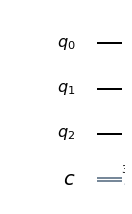

In [27]:
# draw quantum circuit, 3 qubits and classical bits, each
circuit.draw(output='mpl')

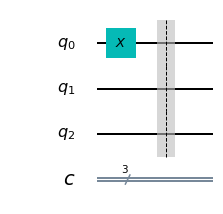

In [28]:
# begin teleportation circuit
# transfer state of qubit[0] to qubit[2], while using qubit[1] as a resource

circuit.x(0)
circuit.barrier()
circuit.draw(output='mpl')

# after the barrier, qubit[0] went from |0> to |1>

In [29]:
# teleportation protocal:
# create entaglement between q1 and q2
circuit.h(1)
circuit.cx(1,2)

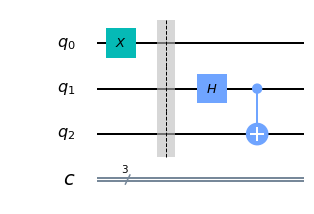

In [30]:
circuit.draw(output = 'mpl')

# q1 and q2 are now entangled

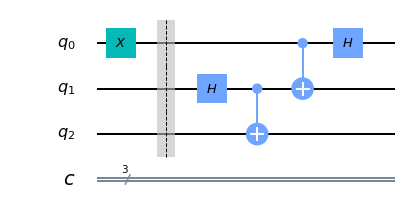

In [31]:
circuit.cx(0,1)
circuit.h(0)
circuit.draw(output='mpl')

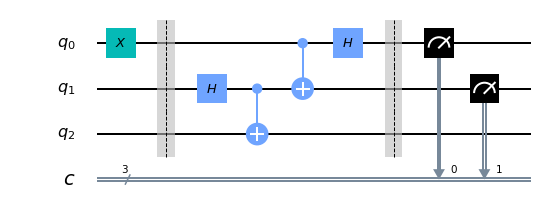

In [32]:
# take 2 measurements of q1 and q2, and place measurements in classical register
circuit.barrier() # to make it easier to see
circuit.measure([0,1], [0,1])
circuit.draw(output='mpl')

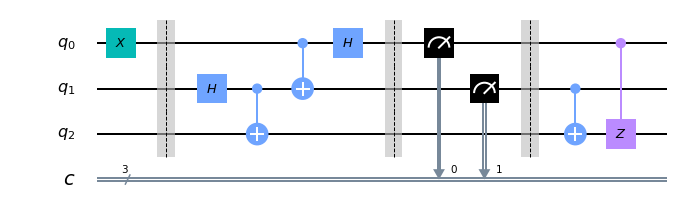

In [33]:
circuit.barrier()
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output='mpl')

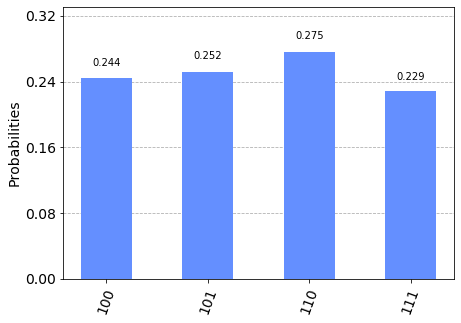

In [34]:
circuit.measure(2,2)

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1024).result()
counts = result.get_counts()

from qiskit.tools.visualization import plot_histogram

plot_histogram(counts)

# for example, the first one is read as c2, c1, c0 = 1, 0, 0

# state c2 is always 1 because information was teleported

In [35]:
# conclusion: we transferred information stored in q0 and teleported it to q2

# entaglement allows us to send quantum information over long distances